In [1]:
!pip install tensorflow==2.12.0

In [2]:
# importing libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [3]:
# reading dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# dividing data into X and y columns
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# feature engineering
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

# drop categorical columns
X = X.drop(["Geography", "Gender"], axis = 1)

# concatenate with dummy columns
X = pd.concat([X, geography, gender], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [8]:
# splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train.shape

(8000, 11)

In [11]:
X_test.shape

(2000, 11)

In [12]:
# initializing ANN
ann = Sequential()

# adding input layer
ann.add(Dense(units=11, activation='relu'))

# adding first hidden layer
ann.add(Dense(units=7, activation='relu'))

# adding second hidden layer
ann.add(Dense(units=6, activation='relu'))

# adding output layer
ann.add(Dense(units=1, activation='sigmoid'))

In [13]:
# learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [14]:
ann.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [16]:
# model training
model_history = ann.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4401 - accuracy: 0.8044 - val_loss: 0.3880 - val_accuracy: 0.8349
Epoch 2/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3663 - accuracy: 0.8507 - val_loss: 0.3987 - val_accuracy: 0.8338
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3537 - accuracy: 0.8556 - val_loss: 0.3644 - val_accuracy: 0.8538
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3461 - accuracy: 0.8578 - val_loss: 0.3591 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3435 - accuracy: 0.8587 - val_loss: 0.3695 - val_accuracy: 0.8466
Epoch 6/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3406 - accuracy: 0.8606 - val_loss: 0.3596 - val_accuracy: 0.8489
Epoch 7/1000
536/536 [==============================] - 3s 7ms/step - loss: 0.3407 - accuracy: 0.8638 - val_loss: 0.3627 - val_accuracy

In [17]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

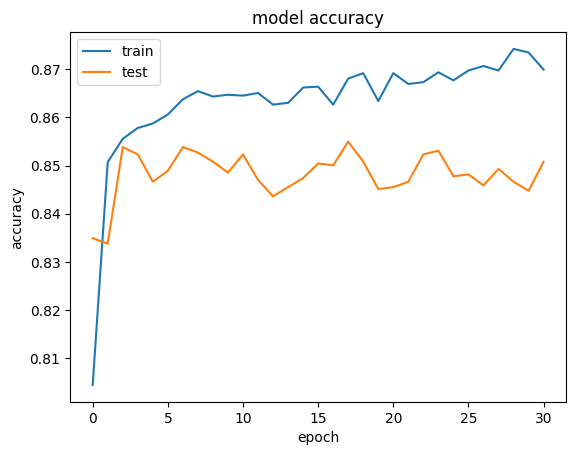

In [18]:
# plotting
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [19]:
# predicting y_test results
y_pred = ann.predict(X_test)
y_pred = (y_pred >= 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [20]:
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1550,   57],
       [ 218,  175]])

In [21]:
# calculating accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8625